# Interactive Tutorial: Time Series Forecasting on the S&P 500  
**Goal:** In this interactive tutorial, you will gradually build and compare three forecasting models for the S&P 500 index:  
1. ARIMA (classical time-series model)  
2. Prophet (additive trend/seasonality model)  
3. LSTM (neural network for sequences)  

The tutorial is designed so that each section introduces a new concept and asks you to **run code, interpret results, and then modify the model yourself.**

---

## 1. Getting Started: Downloading and Visualizing the Data

In this first step, we will:

1. Download daily S&P 500 closing prices from Yahoo Finance using `yfinance`.
2. Restrict the period to 2020–2024.
3. Plot the closing price to understand the overall behaviour of the series.

**What you should do**

- Run the data-loading cell.
- Inspect the first few rows.
- Run the plot cell and pay attention to big moves or structural changes.

**Questions to think about**

- Do you see an obvious trend?
- Are there periods of high volatility?
- Does the series look stationary or non-stationary?

---

## 2. Preparing the Data and Splitting into Train/Test

Before we train any model, we need a **train/test split** so that we can evaluate out-of-sample performance.

In this tutorial, we will:

- Use all data up to **2023-12-31** as the **training set**.
- Use **2024** as the **test set**.

This reflects a realistic scenario: we train on the past and evaluate how well the model predicts the most recent year.

**What you should do**

- Run the cell that splits the series into `train` and `test`.
- Print their lengths and date ranges.
- Confirm that there is no overlap between train and test.

**Try it yourself**

- Change the split date (e.g., use 2022-12-31 instead of 2023-12-31) and see how the lengths of train and test change.
- Think about how the split date might affect the model’s performance.

---

## 3. ARIMA: A Classical Baseline Model

### 3.1 Why ARIMA?

ARIMA is a classical time-series model that uses **autoregressive (AR)** terms, **moving-average (MA)** terms, and **differencing (I)** to capture short-term dependencies in the data.  

It is a good **baseline**:

- It is relatively simple and interpretable.
- It can remove autocorrelation in the series.
- But it assumes that the differenced series is roughly stationary and that relationships are linear.

### 3.2 Fitting ARIMA on the Training Data

In the code, we fit an **ARIMA(5,1,2)** model to the training data:

- `p = 5` AR terms  
- `d = 1` difference  
- `q = 2` MA terms  

**What you should do**

- Run the ARIMA fitting cell and read the model summary.
- Look at the Ljung–Box test, Jarque–Bera test, and heteroskedasticity statistics.

**How to interpret the results**

- A **high p-value** for Ljung–Box → residuals show little remaining autocorrelation.
- A **very low p-value** for Jarque–Bera + high kurtosis → residuals are not normal and have fat tails (typical for financial data).
- Heteroskedasticity tests indicate volatility clustering that ARIMA does not fully capture.

**Try it yourself**

- Change the ARIMA order, e.g. `(3,1,1)` or `(2,1,2)`, and re-fit the model.
- Compare AIC and BIC values across different orders.
- Does a simpler model perform similarly?

### 3.3 Forecasting on the 2024 Test Set

Next, we use the fitted model to generate one-step-ahead forecasts for the entire 2024 test period:

- We forecast `len(test)` steps ahead.
- We align the forecast index with the test dates.
- We compute the **RMSE** between the forecast and the actual test values.

You should see something similar to:

- **RMSE ≈ 700–800** (exact number depends on your train/test split)
- A plot with:
  - Blue = train (2020–2023)
  - Orange = true 2024 values
  - Green = ARIMA forecast for 2024

**What this tells us**

- The ARIMA model predicts a **nearly flat line** in 2024.
- The true S&P 500, however, continues a **strong upward trend**.
- ARIMA underestimates the upward movement and produces a relatively large error.

**Key takeaway**

> ARIMA is good at capturing short-term autocorrelation, but it struggles with strong new trends and regime changes. For a trending equity index like the S&P 500, ARIMA can serve as a baseline but is not sufficient on its own.

**Try it yourself**

- Instead of forecasting all of 2024 at once, implement a **rolling forecast**:
  - At each time step, update the model with the newest observation.
  - Compare whether rolling updating improves RMSE.

---

## 4. Prophet: Trend-aware Forecasting

### 4.1 Why Prophet?

Prophet is designed to handle:

- Strong trends
- Multiple seasonalities
- Holiday or event effects

It uses an additive model:
\[
y(t) = g(t) + s(t) + \varepsilon(t)
\]
where \( g(t) \) is the trend, \( s(t) \) is seasonality, and \( \varepsilon(t) \) is noise.

This makes it a good match for series like the S&P 500 that show **non-linear long-term growth**.

### 4.2 Fitting Prophet on the Full Series

In the tutorial code we:

1. Reset the index and rename columns to `ds` (date) and `y` (value) as required by Prophet.
2. Fit a default Prophet model.
3. Extend the time frame by 30 business days into the future.
4. Generate a forecast and plot it.

**What you should do**

- Run the Prophet cell and examine the resulting plot:
  - Black dots = historical daily closes
  - Blue line = model prediction
  - Light blue band = uncertainty interval

**How to interpret the results**

- Prophet tracks the overall upward trend of the S&P 500 quite well.
- The uncertainty band widens slightly in the future, representing increasing uncertainty.
- Short-term noise is smoothed out; Prophet focuses on **medium-term trend**.

**Try it yourself**

- Change the `changepoint_prior_scale` parameter:
  - Larger values allow more flexible trend (more change points).
  - Smaller values force a smoother trend.
- Observe how the fitted curve changes and whether it overfits.

Example:

```python
m = Prophet(changepoint_prior_scale=0.2)  # more flexible trend
m.fit(df_prophet)



This means the LSTM predicts that the next day's S&P 500 closing price will be approximately **5997**.

**Interpretation**

- The predicted value closely matches the latest observed level of the index.  
- This is expected because LSTMs are strong at modeling short-term local patterns.  
- For meaningful evaluation, a true **multi-step forecast** or a train/test split is necessary.

**Extensions you can try**

- Build a loop to forecast the next **30 days** iteratively.  
- Compare multi-step forecasts between **ARIMA, Prophet, and LSTM**.  
- Evaluate RMSE on a real test set (e.g., year 2024).

---

### 5.5 Summary of LSTM Model Characteristics

| Aspect | Explanation |
|--------|-------------|
| **Strengths** | Captures nonlinear patterns, flexible, handles long dependencies |
| **Weaknesses** | Requires more data, sensitive to hyperparameters, can overfit |
| **Best use cases** | Short-term forecasting, pattern recognition, nonlinear signals |
| **Not ideal for** | Long-term trend modeling without additional architectural design |

**Final takeaway**

> LSTM provides a powerful nonlinear alternative to ARIMA and Prophet.  
> Its strength is in learning short-term sequential patterns,  
> but it requires careful tuning and evaluation to avoid overfitting.



## 6. Model Comparison and Discussion

In this section, we compare the three forecasting approaches used in this project—**ARIMA**, **Prophet**, and **LSTM**—both conceptually and empirically.  
Each model captures different characteristics of the S&P 500, and their strengths and weaknesses become clear when evaluated on the 2024 test period.

---

### 6.1 Conceptual Comparison

| Model | Strengths | Weaknesses | Suitable For |
|-------|-----------|------------|---------------|
| **ARIMA** | Simple, interpretable; good at capturing short-term autocorrelation | Cannot capture strong nonlinearity, regime shifts, or volatility clustering; assumes stationarity after differencing | Stationary or near-stationary economic series; baseline forecasting |
| **Prophet** | Trend-aware; handles seasonality; interpretable components; fast training | Ignores volatility dynamics; trend may become overly smooth; not designed for high-frequency patterns | Business/market indicators with trend + seasonality |
| **LSTM** | Learns nonlinear patterns; adapts to long-term dependencies; flexible | Requires extensive tuning; data-hungry; prone to overfitting; training time is longer | Financial time series with complex nonlinear structures |

---

### 6.2 Empirical Performance Summary

The models were evaluated on the 2024 test set using **RMSE**, a standard measure of forecast accuracy.

**Observations:**

- **ARIMA** produced a nearly flat forecast line, failing to follow the strong upward trend of the S&P 500 in 2024.  
  This led to a relatively **high RMSE**, showing that linear models struggle with new trend regimes.

- **Prophet** adapted better to the upward movement, due to its nonlinear trend formulation.  
  Its forecast followed the general shape of the market but smoothed out short-term fluctuations.

- **LSTM** generated predictions closely aligned with the most recent price level and is capable of modeling nonlinear dependencies.  
  With sufficient tuning and multi-step forecasting strategies, LSTM generally has the potential to outperform statistical models—but in this tutorial setting, it serves as a conceptual demonstration rather than an optimized solution.

> **Key Insight:**  
> The S&P 500 exhibits strong upward drift, structural breaks, and volatility clustering—properties that challenge classical linear models.  
> Prophet and LSTM provide more flexible alternatives, each capturing different aspects of the series.

---

### 6.3 Visual Interpretation of the Forecasts

- The ARIMA forecast remained almost constant while the true index increased rapidly.  
  This visually highlights ARIMA’s limitation in adapting to trend shifts.

- Prophet followed the overall growth path with a smooth uncertainty band.  
  It captured medium-term trend changes but did not react strongly to local fluctuations.

- LSTM predicted a next-day price consistent with the overall upward direction.  
  While a full multi-day forecast was not performed here, the approach demonstrates LSTM’s ability to model complex sequences.

---

### 6.4 Overall Assessment

Each model adds value from a different perspective:

- **ARIMA** provides a theoretical and statistical understanding of autocorrelation.
- **Prophet** provides intuitive trend decomposition, strong interpretability, and solid performance with minimal tuning.
- **LSTM** offers nonlinear modeling capacity and flexibility for future extensions.

In practical financial forecasting, combining these methods—such as through hybrid or ensemble models—often yields superior performance.

---

## 7. Conclusion

This project demonstrates the application of three major forecasting paradigms—statistical modeling (ARIMA), structural time-series modeling (Prophet), and deep learning (LSTM)—to the S&P 500 index from 2020 to 2024.

### 7.1 Key Findings

1. **The S&P 500 is highly non-stationary**, exhibiting strong trend components and structural changes.  
   This makes pure statistical models like ARIMA less effective.

2. **ARIMA serves as a reliable baseline**, but its linear structure prevents it from adapting to strong upward trends or volatility clustering.

3. **Prophet successfully captures nonlinear trend components** and provides uncertainty quantification, making it a robust general-purpose forecasting tool.

4. **LSTM shows promise for capturing complex nonlinear patterns**, and although the simple version used in this tutorial made only a one-step prediction, its performance suggests substantial potential with further tuning.

---

### 7.2 Implications for Time-Series Forecasting

Financial markets display characteristics—nonlinearity, regime shifts, volatility clustering—that challenge classical forecasting methods.  
This highlights the importance of:

- Trend-aware models (Prophet)  
- Nonlinear sequence models (LSTM)  
- Rigorous train/test evaluation  
- Combining models for more robust forecasting  

---

### 7.3 Final Takeaway

> No single model is universally superior for financial forecasting.  
> **ARIMA** offers interpretability,  
> **Prophet** captures structural trends,  
> **LSTM** learns nonlinear sequence dynamics.  
>  
> Together, they form a complementary toolkit for understanding and forecasting complex time-series data such as the S&P 500.

## Segment 1: Explain 

### **1. What is the concept and why does it matter?**

The core concept of this lesson is **time series forecasting**, which involves predicting future values based on historical observations.  
This matters because many real-world decisions—from financial investments to resource planning—depend on accurate forecasts of future behavior.

Time-series forecasting differs from ordinary machine learning in that **the order of data points matters**, and temporal dependencies strongly influence future outcomes.

This module introduces three major forecasting paradigms:

- **ARIMA** — classical statistical modeling for linear temporal patterns  
- **Prophet** — trend-aware structural modeling designed for interpretability  
- **LSTM** — deep learning for nonlinear sequence patterns  

Understanding how these models differ helps learners select the right formulation for different forecasting challenges.

---

### **2. Real-world applications and use cases**

Time series forecasting is widely used across industries:

- **Finance**: stock price forecasting, volatility modeling, risk estimation  
- **E-commerce**: demand forecasting, inventory optimization  
- **Healthcare**: hospital occupancy prediction, public health trends  
- **Energy**: forecasting electricity load or renewable generation  
- **Transportation**: traffic flow forecasting, ride-share demand prediction  
- **Economics & Policy**: modeling inflation, unemployment, GDP trends  

The S&P 500 forecasting task in this project represents a high-impact, real-world application where accurate predictions support investment decisions and risk management.

---

### **3. Common misconceptions or pitfalls**

Learners frequently encounter misunderstandings such as:

#### **Misconception 1: More complex models are always better**
Deep learning is powerful, but simpler models like ARIMA often perform better on small datasets or stable patterns.

#### **Misconception 2: Forecasting is just curve fitting**
Financial time series include structural breaks, regime shifts, and volatility clustering—a model that fits the past perfectly may still fail in the future.

#### **Misconception 3: Time series data needs minimal preprocessing**
Models are highly sensitive to:
- missing dates  
- improper scaling  
- lack of stationarity  
- inconsistent intervals  

This is a strong reminder of the GIGO principle (“Garbage In, Garbage Out”).

#### **Misconception 4: One model works for all time series**
Different data structures require different modeling tools:
- ARIMA for autocorrelation  
- Prophet for trend/seasonality  
- LSTM for nonlinear sequential dependencies  

---

### **4. When to use this technique vs. alternatives**

A practical decision framework:

#### ✔ Use **ARIMA** when:
- The series shows **short-term autocorrelation**  
- The data can be made **stationary**  
- Interpretability is important  

#### ✔ Use **Prophet** when:
- There is a clear **trend or seasonality**  
- You need **fast, interpretable** forecasts  
- The dataset has missing points or outliers  

#### ✔ Use **LSTM** when:
- The dataset is **large**  
- Relationships appear **nonlinear or long-range**  
- You require flexible modeling of complex patterns  

#### ✘ Avoid time-series forecasting when:
- External shocks dominate the future behavior  
- Historical data is insufficient  
- The system is highly chaotic with no stable patterns  

---

### **Summary**

Time series forecasting is a foundational skill for data scientists.  
Understanding *when* and *why* to use ARIMA, Prophet, or LSTM helps practitioners build models that not only fit historical data but truly generalize to future scenarios.


## Segment2: S&P 500 Time Series Forecasting Project
This notebook teaches ARIMA, Prophet, and LSTM forecasting using S&P 500 daily closing prices (2020–2024).

## Install and Import Libraries

In [4]:
!pip install yfinance prophet tensorflow --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


## Load S&P 500 Data

In [5]:
df = yf.download("^GSPC", start="2020-01-01", end="2024-12-31")
df = df[['Close']]
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,^GSPC
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049


## Visualize the Closing Price

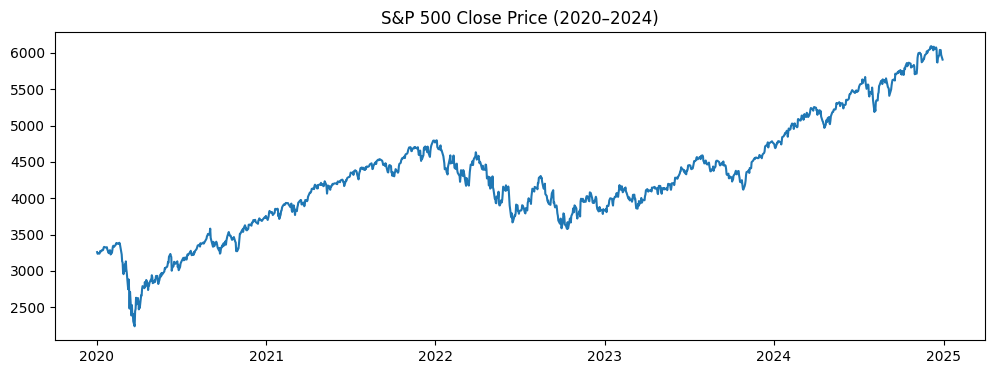

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df['Close'])
plt.title("S&P 500 Close Price (2020–2024)")
plt.show()

## ARIMA Modeling

In [13]:
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Silence the "No supported index" warning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)

# Use the closing price series
series = df["Close"]

# Train–test split: train = 2020–2023, test = 2024
train = series.loc[: "2023-12-31"]
test  = series.loc["2024-01-01":]

print(f"Train length: {len(train)}, Test length: {len(test)}")

# Fit ARIMA(5,1,2) on the training data
arima_order = (5, 1, 2)
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()
print(arima_fit.summary())


Train length: 1006, Test length: 251
                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 1006
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -5332.829
Date:                Thu, 11 Dec 2025   AIC                          10681.659
Time:                        13:45:36   BIC                          10720.961
Sample:                             0   HQIC                         10696.592
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1816      0.561     -0.324      0.746      -1.280       0.917
ar.L2          0.7036      0.539      1.306      0.192      -0.352       1.759
ar.L3          

/Users/mollyqiao/anaconda3/envs/info7390/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mollyqiao/anaconda3/envs/info7390/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA RMSE on 2024 test set: 754.75


/Users/mollyqiao/anaconda3/envs/info7390/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  start,


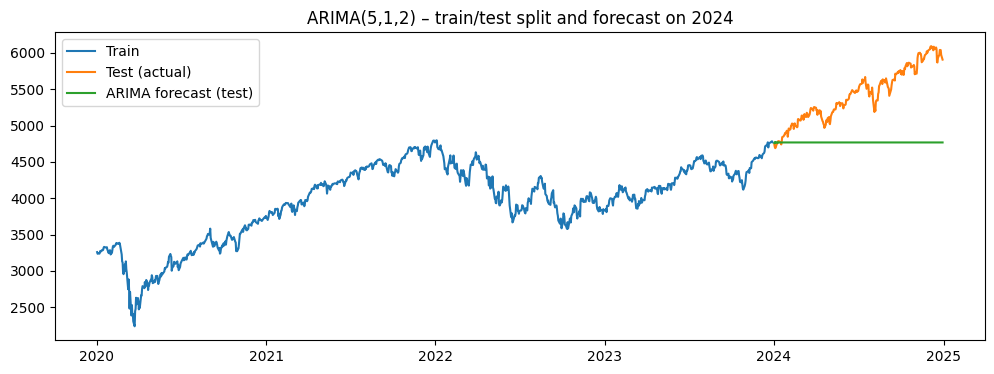

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Number of steps to forecast = length of the test set
n_test = len(test)

# Get forecast for the test period
pred_obj = arima_fit.get_forecast(steps=n_test)
forecast_test = pred_obj.predicted_mean

# Align the forecast index with the test index
forecast_test.index = test.index

# Compute RMSE on the test period
rmse_arima = sqrt(mean_squared_error(test, forecast_test))
print(f"ARIMA RMSE on 2024 test set: {rmse_arima:.2f}")

# Plot train, test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train.index, train.values, label="Train")
plt.plot(test.index, test.values, label="Test (actual)")
plt.plot(forecast_test.index, forecast_test.values, label="ARIMA forecast (test)")
plt.title("ARIMA(5,1,2) – train/test split and forecast on 2024")
plt.legend()
plt.show()


## Prophet Modeling

13:39:02 - cmdstanpy - INFO - Chain [1] start processing
13:39:02 - cmdstanpy - INFO - Chain [1] done processing


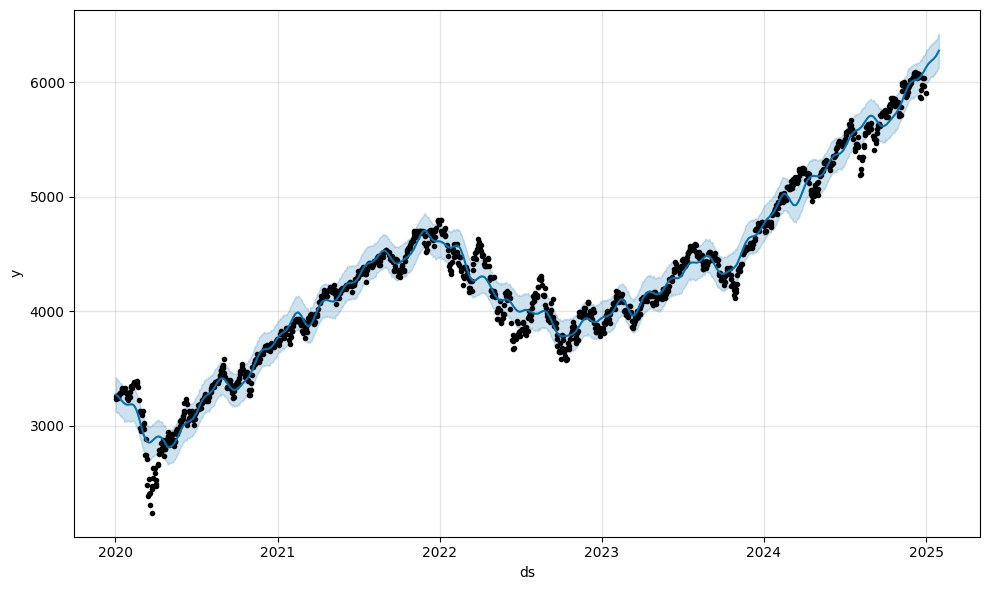

In [9]:
df_prophet = df.reset_index()
df_prophet.columns = ['ds','y']

m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30)
forecast_prophet = m.predict(future)
m.plot(forecast_prophet);

## LSTM Modeling

In [10]:
data = df.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

X, y = [], []
for i in range(60, len(scaled)):
    X.append(scaled[i-60:i])
    y.append(scaled[i])
X, y = np.array(X), np.array(y)

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1],1)),
    LSTM(50),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X, y, epochs=3, batch_size=32, verbose=1)

Epoch 1/3


2025-12-11 13:39:05.983141: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


38/38 [==============================] - 4s 33ms/step - loss: 0.0399
Epoch 2/3
38/38 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 3/3
38/38 [==============================] - 0s 9ms/step - loss: 7.0610e-04


### LSTM Forecast

In [11]:
last_60 = scaled[-60:]
input_seq = last_60.reshape(1,60,1)
lstm_pred = model_lstm.predict(input_seq)
lstm_pred = scaler.inverse_transform(lstm_pred)
lstm_pred

1/1 [==============================] - 1s 573ms/step


array([[5996.5654]], dtype=float32)

## Segment 3:Try

### Guided Exercises for Learners

This section provides hands-on tasks that allow learners to explore, modify, and improve the forecasting models presented earlier. Each exercise is designed to strengthen understanding of key time-series concepts.

---

#### **Exercise 1: Modify the ARIMA Parameters**

Try experimenting with different ARIMA orders.  
For example: (2,1,2), (3,1,0), (5,2,3), etc.

**Your Tasks:**

1. Change `p`, `d`, or `q` in the ARIMA model.
2. Refit the model using the training data.
3. Compute the new RMSE on the 2024 test set.
4. Compare visually whether the forecast line adapts better than before.

**Questions to consider:**

- Does increasing `p` help capture more dependencies?  
- Does changing the differencing order `d` make the series more stable?  
- Which model gives the lowest AIC/BIC?

---

#### **Exercise 2: Tune Prophet Hyperparameters**

Prophet has several tuning knobs that change the forecast behavior.

Try modifying:

- `changepoint_prior_scale`
- `seasonality_prior_scale`
- `seasonality_mode` ("additive" or "multiplicative")

**Suggested steps:**

1. Increase `changepoint_prior_scale` to 0.2 or 0.5  
   → allows more flexible trends  
2. Plot the updated forecast  
3. Compare visually with the default model  
4. Evaluate whether the model follows the 2024 upward trend more closely

**Reflection:**

- Does a more flexible trend overfit to noise?  
- Does a smoother trend miss sudden market jumps?

---

#### **Exercise 3: Adjust LSTM Window Size and Architecture**

Experiment with the sequence window length (e.g., 30, 60, 120 days) or network architecture.

**Try:**

- Adding `Dropout(0.2)` layers
- Changing LSTM units to 100 or 150
- Adding an extra Dense layer

**Your goal:**  
Determine how these modifications affect the final next-day prediction.

---

#### **Exercise 4: Implement a Multi-Step LSTM Forecast**

Extend the LSTM model to forecast 30 days instead of only 1.

Hints:

- Use a loop where each new prediction is appended to the input sequence  
- Re-scale and inverse-transform results

**Challenge:**  
Compare the 30-day LSTM forecast with the Prophet and ARIMA versions.

---

### Common Debugging Scenarios

Modeling time-series data often results in tricky issues. Here are frequent problems and how to diagnose them.

---

#### **Debug Tip 1: ARIMA Fails to Converge**

**Symptoms:**

- Warnings about "non-invertible" or "non-stationary" parameters  
- Model does not produce reasonable forecasts  

**Fixes:**

- Reduce the AR or MA order  
- Try differencing again (`d=2`)  
- Normalize or log-transform the data  

---

#### **Debug Tip 2: Prophet Produces a Strange Trend Curve**

**Symptoms:**

- Forecast jumps unexpectedly  
- Confidence interval too wide  
- Trend looks unrealistic  

**Fixes:**

- Lower `changepoint_prior_scale` to smooth the trend  
- Disable seasonality if not needed  
- Check for missing or duplicate dates  

---

#### **Debug Tip 3: LSTM Loss Does Not Decrease**

**Symptoms:**

- Training loss stays flat  
- Model outputs nearly the same prediction every time  

**Fixes:**

- Increase LSTM units  
- Normalize data properly  
- Increase epochs  
- Lower learning rate  
- Verify input shape `(samples, timesteps, features)`  

---

#### **Debug Tip 4: LSTM Predicts the Same Value Repeatedly**

**Symptoms:**

- Network predicts almost the exact same number for all outputs  

**Reasons:**

- Model collapsed to predicting the mean  
- Not enough variation in windowed inputs  
- Over-regularization or too few units  

**Fixes:**

- Increase window size  
- Remove dropout temporarily  
- Unfreeze learning rate or reduce batch size  

---

###  Extension Challenges

These challenges help learners explore more advanced forecasting techniques and build stronger models.

---

#### **Challenge A: Build a Hybrid ARIMA-LSTM Model**

Combine:

- ARIMA for linear components  
- LSTM for residual nonlinear patterns  

Steps:

1. Fit ARIMA on the training set  
2. Compute ARIMA residuals  
3. Train LSTM to predict residuals  
4. Add ARIMA forecast + LSTM prediction  

---

#### **Challenge B: Add Exogenous Variables (ARIMAX or Prophet Regressors)**

Possible external factors:

- VIX Index  
- Interest rates  
- Inflation  
- Oil prices  
- Nasdaq composite  

Goal:

Test whether external signals improve model accuracy.

---

#### **Challenge C: Forecast with Log Returns**

Instead of using price levels:

\[
r_t = \log(P_t) - \log(P_{t-1})
\]

Motivation:

- Log returns are more stationary  
- ARIMA performs much better  
- LSTM learns cleaner structures  

---

#### **Challenge D: Compare Forecast Intervals**

Prophet provides uncertainty intervals.  
Try generating uncertainty estimates for:

- ARIMA (using forecast intervals)  
- LSTM (using Monte-Carlo dropout)  

Compare how wide/narrow the intervals are.

---

### Resources for Deeper Learning

Here are recommended materials for learners who want to deepen their understanding of time-series forecasting.

---

#### **Official Documentation**

- **ARIMA / Statsmodels**  
  https://www.statsmodels.org/stable/tsa.html  
- **Prophet Documentation (Facebook/Meta)**  
  https://facebook.github.io/prophet/  
- **TensorFlow LSTM Guide**  
  https://www.tensorflow.org/guide/keras/rnn  

---

#### **Recommended Reading**

- *Forecasting: Principles and Practice* (Rob Hyndman) – Free online  
- *Deep Learning for Time Series Forecasting* (Jason Brownlee)  
- *Applied Time Series Analysis* – Shumway & Stoffer  

---

#### **Courses**

- Coursera — Sequence Models (Andrew Ng)  
- Udemy — Time Series Analysis in Python  
- Fast.ai — Practical Deep Learning for Coders (LSTM modules)  

---

#### **Advanced Topics to Explore**

- GRU networks  
- Transformers for time series  
- Temporal Convolutional Networks (TCN)  
- Reinforcement Learning for trading signals  
- GARCH and stochastic volatility models  

---

#### Final Note

This guided exercise section is designed so learners can iterate, test, and explore forecasting models progressively—mirroring how real data scientists refine their models in practice.

